In [29]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [3]:
def readJSON(path):
    for l in gzip.open(path, 'r+'):
        d = eval(l)
        u = d['userID']
        try:
            g = d['gameID']
        except Exception as e:
            g = None
        yield u,g,d
    
def parseData(path):
    for l in gzip.open(path, 'r+'):
        yield eval(l)

In [20]:
cars = pd.read_csv('vehicles.csv')

In [14]:
temp = cars.drop(columns=['Unnamed: 0', 'url', 'region_url', 'VIN', 'image_url', 'lat','long','posting_date'])['type'].value_counts()
cars.drop(columns=['Unnamed: 0', 'url', 'region_url', 'VIN', 'image_url', 'lat','long','posting_date'])['type'].value_counts()/sum(temp)

sedan          0.267354
SUV            0.231224
pickup         0.125459
truck          0.103319
other          0.069933
coupe          0.055304
hatchback      0.047436
wagon          0.030315
van            0.027713
convertible    0.019868
mini-van       0.018129
bus            0.002075
offroad        0.001873
Name: type, dtype: float64

In [15]:
wack = cars.drop(columns=['Unnamed: 0', 'url', 'region_url', 'VIN', 'image_url', 'lat','long','posting_date']).dropna()['type'].value_counts()
wack/sum(wack)

sedan          0.294327
SUV            0.263000
truck          0.154327
pickup         0.074595
coupe          0.050940
hatchback      0.043999
van            0.042355
mini-van       0.026498
convertible    0.021383
wagon          0.019476
other          0.004521
offroad        0.003379
bus            0.001199
Name: type, dtype: float64

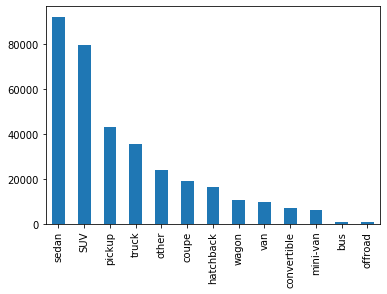

In [16]:
temp.plot(kind='bar')

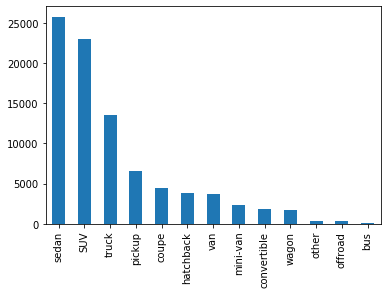

In [17]:
wack.plot(kind='bar')

In [22]:
temp2 = cars.drop(columns=['Unnamed: 0', 'url', 'region_url', 'VIN', 'image_url', 'lat','long','posting_date'])['manufacturer'].value_counts()
temp2/sum(temp2)

ford               0.181062
chevrolet          0.147677
toyota             0.087676
honda              0.058792
nissan             0.053760
jeep               0.048103
ram                0.040221
gmc                0.039244
dodge              0.038023
bmw                0.028073
hyundai            0.024944
mercedes-benz      0.024155
subaru             0.023887
volkswagen         0.023839
kia                0.020123
chrysler           0.017043
lexus              0.016180
cadillac           0.015325
buick              0.013657
mazda              0.013480
audi               0.012689
acura              0.009109
infiniti           0.008441
lincoln            0.007586
pontiac            0.006902
volvo              0.006514
mini               0.005296
mitsubishi         0.005230
porsche            0.004043
rover              0.003777
mercury            0.003739
saturn             0.003166
tesla              0.002425
jaguar             0.002409
fiat               0.002170
alfa-romeo         0

In [23]:
wack2 = cars.drop(columns=['Unnamed: 0', 'url', 'region_url', 'VIN', 'image_url', 'lat','long','posting_date']).dropna()['manufacturer'].value_counts()
wack2/sum(wack2)

ford               0.189285
chevrolet          0.152033
toyota             0.087735
honda              0.065336
nissan             0.055278
jeep               0.040015
gmc                0.039193
dodge              0.036510
ram                0.034580
hyundai            0.025459
subaru             0.024580
bmw                0.023975
volkswagen         0.022536
mercedes-benz      0.021817
kia                0.019625
chrysler           0.019088
cadillac           0.015926
lexus              0.014510
mazda              0.014111
buick              0.013323
audi               0.010823
acura              0.009282
pontiac            0.009236
lincoln            0.008619
volvo              0.007843
infiniti           0.006884
mitsubishi         0.006816
mercury            0.005491
mini               0.004783
saturn             0.004418
rover              0.002592
porsche            0.002569
jaguar             0.002409
fiat               0.001827
tesla              0.000662
alfa-romeo         0

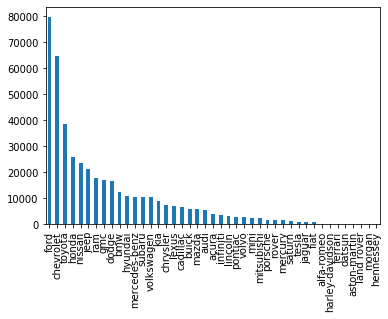

In [25]:
temp2.plot(kind='bar')

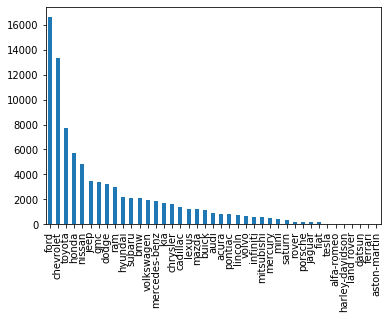

In [26]:
wack2.plot(kind='bar')

In [21]:
cars.drop(columns=['Unnamed: 0', 'url', 'region_url', 'VIN', 'image_url', 'lat','long','posting_date']).dropna()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
3,7240103965,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al
4,7239983776,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al
14,7237009212,auburn,4900,2003.0,ford,expedition,good,8 cylinders,gas,177000.0,clean,automatic,rwd,full-size,SUV,blue,"2003 Ford Expedition Eddie Baurer. 5.4L 2x4, S...",al
19,7235942858,auburn,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,I'm putting up for sale my Jeep Gladiator. I j...,al
47,7231143951,auburn,6250,2010.0,ford,fusion sel,good,6 cylinders,gas,82000.0,clean,automatic,fwd,full-size,sedan,silver,"Driven 82,000 miles Automatic transmission Ext...",al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458204,7240975107,wausau,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,clean,automatic,fwd,mid-size,sedan,black,"2006 Buick Lacrosse, CX 3.8 V6, 1 owner, clean...",wi
458208,7240959076,wausau,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,mid-size,SUV,silver,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi
458209,7240954682,wausau,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,mid-size,SUV,white,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi
458210,7240645700,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,mid-size,coupe,black,"53,000 miles. Cosmetically, in near mint condi...",wy


In [27]:
cars_naless = cars.drop(columns=['Unnamed: 0', 'url', 'region_url', 'VIN', 'image_url', 'lat','long','posting_date']).dropna()

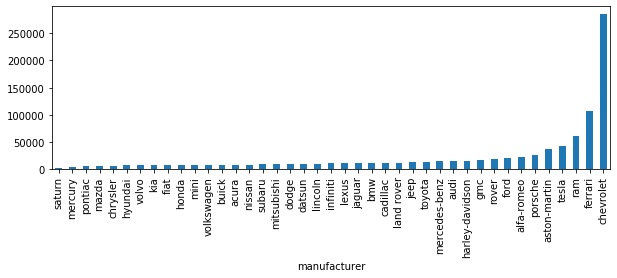

In [31]:
plt.figure(figsize = (10,3))
cars_naless.groupby('manufacturer').mean()['price'].sort_values().plot(kind='bar');

In [37]:
cars_0_naless = cars_naless[cars_naless['price'] != 0].reset_index(drop=True)

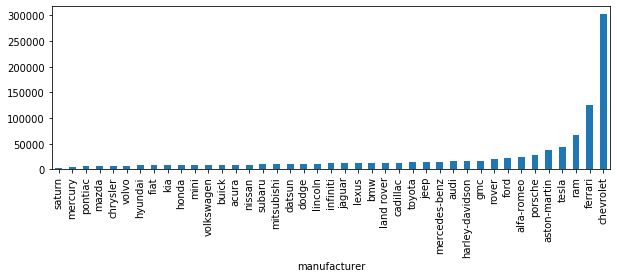

In [39]:
plt.figure(figsize = (10,3))
cars_0_naless.groupby('manufacturer').mean()['price'].sort_values().plot(kind='bar');

In [56]:
cars_0_naless[cars_0_naless['manufacturer'] == 'chevrolet'].sort_values('price',ascending=False)['description'].iloc[2]

'"Say Hello to my Little Friend" CUSTOM, CHROME AND CRAZY C10! 1971 CHEVY C10  Location: Andover, NJ 07821 Year: 1971 Make: Chevrolet Model: C10 Vin# 1CE141B635219 Miles: 20 Brand New Engine: JEGS- Chevy 572hp - 30401 Kit, E-Z Electronic Fuel Injection 2.0, Wildwood Master Cylinder, Black Ceramic Coated Headers, Hydro-Dipped Valve Covers, Be-Cool Radiator, SureFit Air Condition System w/ Chrome Lines, Chromed Water Pump Trans: 4L80E-11" Torque Converter 3000 RPM Stall Speed, HDM Electronics Computer Shift, JEGS-18" Stainless Steel Double "D" Shaft Exhaust: PYPES - 3" Universal Builders Exhaust w/JEGS - Stainless Steel Mufflers & Tips Brakes: Stainless Steel System & Lines Wheels: Foose Impala - 20x12 & 19x10 w/6" Backs Spacers Tires: Michelin Super Sport -315x35x20 & 275x35x19 Competition Engineering Over-sized Wheel Tubs Custom Door Popper Entrance System Custom Fuel Tank & Stainless Steel Gas Filler Screen Cap Pioneer Stereo System & Kicker Components Custom Power Rear Window w/ Scar

In [70]:
cars_0_naless[cars_0_naless['price'] < 101].sort_values('price',ascending=False)#['description'].iloc[3]#[:20]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
988,7233483495,mobile,100,2015.0,lexus,es 300h,like new,6 cylinders,hybrid,52115.0,clean,automatic,fwd,full-size,sedan,white,WOW TOP OF THE LINE LEXUS WITH ONLY 52000 MI...,al
1021,7231332293,mobile,100,2015.0,lexus,es 300h,like new,6 cylinders,hybrid,52115.0,clean,automatic,fwd,full-size,sedan,white,WOW TOP OF THE LINE LEXUS WITH ONLY 52000 MI...,al
61966,7240343980,lehigh valley,100,2018.0,nissan,versa,excellent,4 cylinders,gas,40000.0,clean,automatic,fwd,mid-size,sedan,white,ALL CARS $100-500 DUE AT SIGNING!!!! NO CREDI...,pa
32670,7237022438,frederick,100,1987.0,ford,f-150,salvage,6 cylinders,gas,265000.0,missing,manual,rwd,full-size,truck,red,This is a non-running 87 f150. NO Title Need t...,md
61975,7239925223,lehigh valley,100,2018.0,nissan,versa,excellent,4 cylinders,gas,40000.0,clean,automatic,fwd,mid-size,sedan,grey,ALL CARS $100-500 DUE AT SIGNING!!!! NO CREDI...,pa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,7231974894,ocala,1,2017.0,subaru,wrx,excellent,10 cylinders,gas,47289.0,clean,other,4wd,compact,sedan,red,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl
16791,7231975026,ocala,1,2016.0,jeep,wrangler,excellent,10 cylinders,gas,34916.0,clean,other,4wd,full-size,SUV,black,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl
16780,7232989906,ocala,1,2005.0,chevrolet,silverado 3500,excellent,8 cylinders,diesel,140902.0,clean,automatic,rwd,full-size,pickup,white,"2005 Chevy Silverado 3500 LT - Dually, leather...",fl
16744,7234836185,ocala,1,2005.0,jeep,liberty 4x4 limited,good,6 cylinders,gas,200000.0,clean,automatic,4wd,mid-size,SUV,blue,***MUST SELL 2005 JEEP LIBERTY 4x4 LIMITED $2...,fl


In [88]:
len(cars_0_naless[(cars_0_naless['description'].str.isupper()) & (cars_0_naless['price'] < 10000)]['description'].unique())#.iloc[3]#[:20]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
61,7238213055,birmingham,9900,2014.0,toyota,camry se 4dr sedan,excellent,4 cylinders,gas,105695.0,clean,automatic,fwd,mid-size,sedan,red,PLEASE REFER TO THE PICTURE OF THE ORIGINAL WI...,al
337,7230203831,birmingham,1500,1997.0,mazda,626,good,6 cylinders,gas,193000.0,clean,automatic,fwd,mid-size,sedan,green,NEEDS FUEL PUMP,al
410,7225573395,birmingham,3500,2006.0,honda,accord,good,6 cylinders,gas,275000.0,clean,automatic,fwd,mid-size,sedan,white,"CRANKS, RUNS, DRIVES.",al
415,7224999868,birmingham,9950,2013.0,volkswagen,passat tdi se,excellent,4 cylinders,gas,60120.0,clean,automatic,fwd,full-size,sedan,black,2013 VOLSWAGEN PASSAT TDI SE TURBO DIESEL. 601...,al
727,7231370693,huntsville / decatur,5500,2010.0,toyota,corolla,good,4 cylinders,gas,90321.0,rebuilt,automatic,fwd,compact,sedan,custom,4DOOR,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84043,7241009526,houston,2250,1994.0,jeep,grand cherokee laredo,good,8 cylinders,gas,188000.0,clean,automatic,4wd,mid-size,SUV,green,1994 JEEP GRAND CHEROKEE LAREDO ***** 4 BY 4 *...,tx
84044,7241009069,houston,1650,2005.0,chevrolet,equinox,good,6 cylinders,gas,138000.0,rebuilt,automatic,fwd,mid-size,SUV,green,2005 CHEVROLET EQUINOX ****** FOREST GREEN WIT...,tx
84196,7241005423,milwaukee,6500,2011.0,gmc,terrain slt,good,4 cylinders,gas,130000.0,clean,automatic,fwd,mid-size,SUV,grey,"130K MI. ALL POWER, LEATHER, AND SUNROOF ! RUN...",wi
84197,7241004327,milwaukee,3300,2006.0,mazda,6,good,6 cylinders,gas,55900.0,clean,automatic,fwd,mid-size,sedan,silver,"56K MI. ALL POWER , LEATHER INTERIOR , 6CYL. A...",wi


In [96]:
cars_0_naless.drop_duplicates('description',keep=False)
jasraj = cars_0_naless['description'].value_counts()
len(jasraj[jasraj>1])
set(jasraj[jasraj>1].values)

{2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 25,
 28,
 29,
 30,
 33,
 40,
 41,
 71,
 106,
 143,
 189}

In [110]:
cleaned_cars = cars_0_naless[(cars_0_naless['price'] < 300000) & (cars_0_naless['price'] > 100)]#.sort_values('price',ascending=False)#[:20]

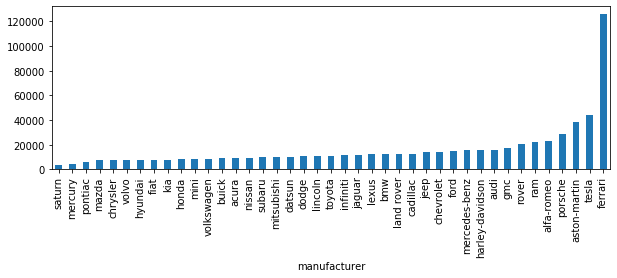

In [111]:
plt.figure(figsize = (10,3))
cleaned_cars.groupby('manufacturer').mean()['price'].sort_values().plot(kind='bar');

In [3]:
#listings_summary = pd.read_csv('listings.csv')
listings_detail = pd.read_csv('listings_detail.csv')
#reviews_summary = pd.read_csv('reviews.csv')
reviews_detail = pd.read_csv('reviews_detail.csv')
#calendar = pd.read_csv('calendar.csv')
neighborhoods = pd.read_csv('neighbourhoods.csv')

In [4]:
#listings_summary

In [5]:
listings_detail

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,20201025051130,2020-10-25,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,https://a0.muscache.com/pictures/d3342744-140a...,8435,https://www.airbnb.com/users/show/8435,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
1,29967,https://www.airbnb.com/rooms/29967,20201025051130,2020-10-25,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,...,10.0,10.0,10.0,NaN,f,5,5,0,0,0.49
2,38245,https://www.airbnb.com/rooms/38245,20201025051130,2020-10-25,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,https://www.airbnb.com/users/show/164137,...,10.0,9.0,9.0,NaN,f,3,0,3,0,1.16
3,54001,https://www.airbnb.com/rooms/54001,20201025051130,2020-10-25,"La Jolla 2 Bdr Cottage: 1 Qn; 2Twns, Blks 2 Ocn","Quiet, off the beaten path, this secluded cot...","Tranquility, stately trees, meditative, zen-fu...",https://a0.muscache.com/pictures/47035b04-633c...,252692,https://www.airbnb.com/users/show/252692,...,10.0,10.0,10.0,NaN,f,2,1,1,0,1.96
4,62274,https://www.airbnb.com/rooms/62274,20201025051130,2020-10-25,"charming, colorful, close to beach","Modern, cozy, artsy, and european in a lush ga...","We are in walking distance to Starbucks, Trade...",https://a0.muscache.com/pictures/84577734/93ca...,302986,https://www.airbnb.com/users/show/302986,...,10.0,10.0,10.0,NaN,f,2,2,0,0,5.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8683,46028900,https://www.airbnb.com/rooms/46028900,20201025051130,2020-10-25,Amazing apt in Pacific Beach (Crown Point area),Hello there . My name is Mariana . I have an 2...,NaN,https://a0.muscache.com/pictures/c7db29d8-f13b...,69059229,https://www.airbnb.com/users/show/69059229,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
8684,46035696,https://www.airbnb.com/rooms/46035696,20201025051130,2020-10-25,Gaslamp District Luxury High Rise,NaN,NaN,https://a0.muscache.com/pictures/2b684b36-1d3e...,102202334,https://www.airbnb.com/users/show/102202334,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
8685,46036151,https://www.airbnb.com/rooms/46036151,20201025051130,2020-10-25,Gas lamp San Diego High-Rise,NaN,NaN,https://a0.muscache.com/pictures/b2232b80-92f5...,102202334,https://www.airbnb.com/users/show/102202334,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
8686,46037988,https://www.airbnb.com/rooms/46037988,20201025051130,2020-10-25,South Park Modern Retreat!,"Welcome to South Park, one of San Diego's olde...",This is the best neighborhood in San Diego! As...,https://a0.muscache.com/pictures/79e51e22-d1d8...,2232295,https://www.airbnb.com/users/show/2232295,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [6]:
#reviews_summary

In [7]:
#Take out reviewer_name
reviews_detail

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,29967,62788,2010-07-09,151260,Debbie,When I booked our stay in San Diego at Dennis ...
1,29967,64568,2010-07-14,141552,Eric,This was my first experience with using airbnb...
2,29967,67502,2010-07-22,141591,David,We found the house to be very accommodating--e...
3,29967,70466,2010-07-29,125982,Anders,As advertised and more. Dennis was very helpfu...
4,29967,74876,2010-08-07,29835,Miyoko,We had a great time in San Diego. Denis' house...
...,...,...,...,...,...,...
418381,45879403,700933618,2020-10-16,356204795,Shanna,Jeffrey and his girlfriend were outstanding ho...
418382,45879403,701234991,2020-10-17,57040410,Liz,This place was perfect for me! It was really s...
418383,45879403,701918134,2020-10-18,310817121,Melissa,This place was beautiful! Didn’t have a doubt....
418384,45879403,702188172,2020-10-19,46954062,Steven,Highly recommend this place for anyone wanting...


In [8]:
#calendar

In [9]:
neighborhoods

,neighbourhood_group,neighbourhood
0,NaN,Allied Gardens
1,NaN,Alta Vista
2,NaN,Amphitheater And Water Park
3,NaN,Balboa Park
4,NaN,Bario Logan
...,...,...
103,NaN,Village Center
104,NaN,Webster
105,NaN,West University Heights
106,NaN,Wooded Area


In [10]:
pd.merge(listings_detail,reviews_detail.drop(columns=['id','reviewer_name']),how='outer',left_on='id', right_on='listing_id')#[['host_id_x','host_id_y']]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,date,reviewer_id,comments
0,5570,https://www.airbnb.com/rooms/5570,20201025051130,2020-10-25,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,https://a0.muscache.com/pictures/d3342744-140a...,8435,https://www.airbnb.com/users/show/8435,...,f,3,3,0,0,NaN,NaN,NaN,NaN,NaN
1,29967,https://www.airbnb.com/rooms/29967,20201025051130,2020-10-25,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,...,f,5,5,0,0,0.49,29967.0,2010-07-09,151260.0,When I booked our stay in San Diego at Dennis ...
2,29967,https://www.airbnb.com/rooms/29967,20201025051130,2020-10-25,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,...,f,5,5,0,0,0.49,29967.0,2010-07-14,141552.0,This was my first experience with using airbnb...
3,29967,https://www.airbnb.com/rooms/29967,20201025051130,2020-10-25,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,...,f,5,5,0,0,0.49,29967.0,2010-07-22,141591.0,We found the house to be very accommodating--e...
4,29967,https://www.airbnb.com/rooms/29967,20201025051130,2020-10-25,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,...,f,5,5,0,0,0.49,29967.0,2010-07-29,125982.0,As advertised and more. Dennis was very helpfu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419607,46028900,https://www.airbnb.com/rooms/46028900,20201025051130,2020-10-25,Amazing apt in Pacific Beach (Crown Point area),Hello there . My name is Mariana . I have an 2...,NaN,https://a0.muscache.com/pictures/c7db29d8-f13b...,69059229,https://www.airbnb.com/users/show/69059229,...,f,1,1,0,0,NaN,NaN,NaN,NaN,NaN
419608,46035696,https://www.airbnb.com/rooms/46035696,20201025051130,2020-10-25,Gaslamp District Luxury High Rise,NaN,NaN,https://a0.muscache.com/pictures/2b684b36-1d3e...,102202334,https://www.airbnb.com/users/show/102202334,...,t,2,2,0,0,NaN,NaN,NaN,NaN,NaN
419609,46036151,https://www.airbnb.com/rooms/46036151,20201025051130,2020-10-25,Gas lamp San Diego High-Rise,NaN,NaN,https://a0.muscache.com/pictures/b2232b80-92f5...,102202334,https://www.airbnb.com/users/show/102202334,...,t,2,2,0,0,NaN,NaN,NaN,NaN,NaN
419610,46037988,https://www.airbnb.com/rooms/46037988,20201025051130,2020-10-25,South Park Modern Retreat!,"Welcome to South Park, one of San Diego's olde...",This is the best neighborhood in San Diego! As...,https://a0.muscache.com/pictures/79e51e22-d1d8...,2232295,https://www.airbnb.com/users/show/2232295,...,f,1,1,0,0,NaN,NaN,NaN,NaN,NaN


In [11]:
gpd.read_file('neighbourhoods.geojson')

,neighbourhood,neighbourhood_group,geometry
0,Amphitheater And Water Park,None,"MULTIPOLYGON (((-117.01452 32.58790, -117.0144..."
1,Bella Lago,None,"MULTIPOLYGON (((-116.94128 32.68431, -116.9412..."
2,Bonita Long Canyon,None,"MULTIPOLYGON (((-117.01149 32.66352, -117.0114..."
3,East Lake,None,"MULTIPOLYGON (((-116.99302 32.66040, -116.9816..."
4,Eastlake Trails,None,"MULTIPOLYGON (((-116.95512 32.64124, -116.9550..."
...,...,...,...
103,University City,None,"MULTIPOLYGON (((-117.21464 32.87919, -117.2139..."
104,Valencia Park,None,"MULTIPOLYGON (((-117.08555 32.70113, -117.0854..."
105,Webster,None,"MULTIPOLYGON (((-117.11058 32.71833, -117.1102..."
106,West University Heights,None,"MULTIPOLYGON (((-117.16408 32.76053, -117.1636..."


In [12]:
listings_detail.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [13]:
listings_detail['bathrooms_text'].value_counts()

1 bath               4010
2 baths              1599
1 shared bath         653
1 private bath        635
3 baths               446
2.5 baths             394
1.5 baths             244
3.5 baths             128
4 baths               122
1.5 shared baths      121
4.5 baths              69
2 shared baths         48
5 baths                41
5.5 baths              26
0 baths                24
2.5 shared baths       17
0 shared baths         16
6 baths                15
3 shared baths         11
8 baths                 9
5 shared baths          8
7 baths                 7
4 shared baths          7
6.5 baths               6
4.5 shared baths        4
6 shared baths          4
8 shared baths          3
Half-bath               3
7.5 baths               3
Shared half-bath        2
9 baths                 1
9.5 baths               1
8.5 baths               1
27.5 baths              1
10 baths                1
Private half-bath       1
3.5 shared baths        1
Name: bathrooms_text, dtype: int64

In [14]:
listings_detail[listings_detail['bathrooms_text'] == '27.5 baths']

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2592,18415873,https://www.airbnb.com/rooms/18415873,20201025051130,2020-10-25,Condo in Downtown San Diego,"Condo in Downtown San Diego, full view of DT S...",Main trolley station conveniently located at t...,https://a0.muscache.com/pictures/7ffe2704-5c6e...,5959985,https://www.airbnb.com/users/show/5959985,...,6.0,9.0,7.0,NaN,f,2,2,0,0,0.07


In [15]:
listings_detail.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

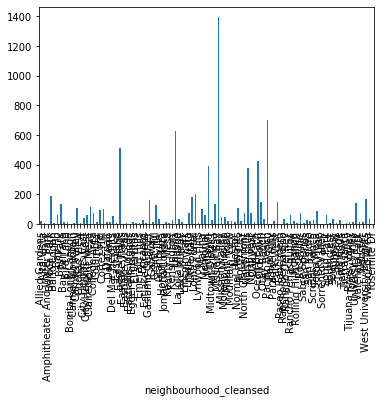

In [16]:
listings_detail.groupby('neighbourhood_cleansed').count()['number_of_reviews'].plot(kind='bar')

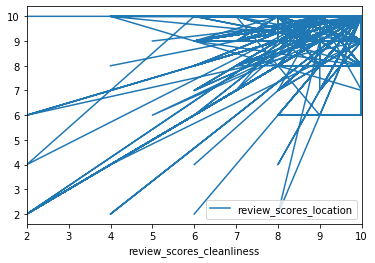

In [17]:
listings_detail.plot('review_scores_cleanliness','review_scores_location')

In [18]:
listings_detail[listings_detail['neighbourhood_cleansed'] == 'Torrey Pines']['amenities'].str.len()

36      598
228     624
606     311
749     321
865     763
1818    609
2555    476
2778    358
4406    620
5388    571
5659    505
8065    696
8130    321
Name: amenities, dtype: int64

In [19]:
listings_detail[listings_detail['neighbourhood_cleansed'] == 'Kearny Mesa']['amenities'].str.len()

578     382
2244    375
2372    191
3883    416
4699    553
5278    425
8255    318
Name: amenities, dtype: int64

In [20]:
len(np.unique(reviews_detail['reviewer_id']))

377483

In [21]:
reviews_detail

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,29967,62788,2010-07-09,151260,Debbie,When I booked our stay in San Diego at Dennis ...
1,29967,64568,2010-07-14,141552,Eric,This was my first experience with using airbnb...
2,29967,67502,2010-07-22,141591,David,We found the house to be very accommodating--e...
3,29967,70466,2010-07-29,125982,Anders,As advertised and more. Dennis was very helpfu...
4,29967,74876,2010-08-07,29835,Miyoko,We had a great time in San Diego. Denis' house...
...,...,...,...,...,...,...
418381,45879403,700933618,2020-10-16,356204795,Shanna,Jeffrey and his girlfriend were outstanding ho...
418382,45879403,701234991,2020-10-17,57040410,Liz,This place was perfect for me! It was really s...
418383,45879403,701918134,2020-10-18,310817121,Melissa,This place was beautiful! Didn’t have a doubt....
418384,45879403,702188172,2020-10-19,46954062,Steven,Highly recommend this place for anyone wanting...


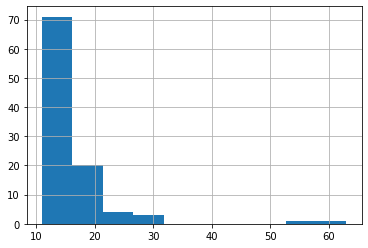

In [22]:
reviews_detail.groupby('reviewer_id').count()['comments'].sort_values(ascending=False)[:100].hist()
#['comments'].hist(bins=67);

In [23]:
temp = reviews_detail.groupby('reviewer_id').count()

In [24]:
repeat_index = temp[temp['listing_id'] != 1].index

In [25]:
dupe_reviews = reviews_detail[reviews_detail['reviewer_id'].isin(repeat_index)]

In [26]:
sum(dupe_reviews['comments'].isna())

32

In [27]:
dupe_reviews = dupe_reviews.dropna()
wait = dupe_reviews.groupby('reviewer_id').count()
repeat_index2 = wait[wait['listing_id'] != 1].index
dupe_reviews = dupe_reviews[dupe_reviews['reviewer_id'].isin(repeat_index2)]
dupe_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
18,29967,1381453,2012-05-30,123852,Amy,This place is as everyone says... a great plac...
20,29967,1648521,2012-07-07,2361215,Leanna,This place is great! Dennis was extremely acc...
21,29967,1767888,2012-07-22,862819,Lindsay,Dennis was a great host. He was very quick to ...
26,29967,2544825,2012-10-08,3639648,Susan,Dennis you were an awesome host. The house wa...
32,29967,3277426,2013-01-05,2546630,Al,We had a great stay in Pacific Beach. The apar...
...,...,...,...,...,...,...
418373,45796297,702379998,2020-10-20,338684327,Ricardo,Great place to stay. Is not too close to many ...
418377,45817195,702191556,2020-10-19,20739684,Carol,Luz’s place is very cozy and quiet. She and he...
418378,45831887,701887980,2020-10-18,274378699,Joseph,Was great~
418379,45844736,702790558,2020-10-22,370487090,Ahmad,Thank you Najib \n\nReally I’m so glad that I ...


In [28]:
train_listing = dupe_reviews[:60000]['listing_id']
val_listing = dupe_reviews[60000:]['listing_id']

In [29]:
t_text = [d.lower() for d in dupe_reviews[:60000]['comments']]
v_text = [d.lower() for d in dupe_reviews[60000:]['comments']]

In [30]:
vectorizor = TfidfVectorizer(stop_words='english',sublinear_tf=True).fit(t_text)
#vectC = CountVectorizer(max_features=5000).fit(t_text)
tfidf_train = vectorizor.transform(t_text)
tfidf_val = vectorizor.transform(v_text)

In [ ]:
#[c for c in d['text'].lower() if not c in punctuation]
#.686

#count_train = vectC.transform(t_text)
#count_val = vectC.transform(v_text)

#clfTest = LogisticRegression().fit(tfidf_train,train_listing)
clfTest = RandomForestClassifier().fit(tfidf_train,train_listing)
#clfTest = LogisticRegression(max_iter=5000).fit(count_train,genreID)

In [ ]:
tfidf_pred = clfTest.predict(tfidf_val)
#count_pred = clfTest.predict(count_val)

In [ ]:
#Finds the True Positive, False Positive, True Negative, and False Negative array values
TP_TFIDF = np.logical_and(tfidf_pred, val_listing)
FP_TFIDF = np.logical_and(tfidf_pred, np.logical_not(val_listing))
TN_TFIDF = np.logical_and(np.logical_not(tfidf_pred), np.logical_not(val_listing))
FN_TFIDF = np.logical_and(np.logical_not(tfidf_pred), val_listing)

#Finds the number of True Positive, False Positive, True Negative, and False Negative
TPTFIDF = sum(TP_TFIDF)
FPTFIDF = sum(FP_TFIDF)
TNTFIDF = sum(TN_TFIDF)
FNTFIDF = sum(FN_TFIDF)

{'Accuracy': (TPTFIDF + TNTFIDF) / (TPTFIDF + FPTFIDF + TNTFIDF + FNTFIDF)}

In [136]:
dupe_reviews['comments'].dtypes

dtype('O')

In [146]:
what = []
for x in dupe_reviews[:60000]['comments']:
    if type(x) is str:
        what.append(1)
    else:
        what.append(0)

In [144]:
np.unique(what)

array([0, 1])

In [148]:
locat = []
for x in range(len(what)):
    if what[x] == 0:
        locat.append(x)

In [150]:
len(locat)

26

In [154]:
locat

[9829,
 11345,
 12340,
 15961,
 23700,
 27086,
 27103,
 28434,
 32446,
 33681,
 40597,
 42341,
 45126,
 45298,
 45637,
 47771,
 49397,
 50375,
 50859,
 53439,
 54896,
 55496,
 57903,
 58114,
 58421,
 58536]

In [155]:
dupe_reviews[dupe_reviews['comments'].isnull()].index.tolist()

[59874,
 69639,
 75631,
 98050,
 147537,
 168603,
 168717,
 177027,
 202413,
 209428,
 250556,
 261301,
 278253,
 279306,
 280607,
 293881,
 304231,
 309810,
 312401,
 327901,
 335800,
 339095,
 353379,
 354617,
 356602,
 357118,
 373217,
 373481,
 388455,
 393691,
 405466,
 410457]

In [160]:
dupe_reviews[:60000]['comments'].loc[9829].lower()

"highly recommend this location for solo travelers or couples looking to explore san diego. the house is beautiful and very well equipped. the location is wonderful, within walking distance of balboa park and little italy, and everything else a short drive/uber away. the room is relatively spacious, and includes a private balcony with a nice view of the san diego skyline. you even have your own private toilet+sink (you have the share the shower though). you share the house with several other guests, but everyone respects the space and it is easy to keep to your own if you want. like many reviews mention, this listing happens to be in the flight path of planes arriving in san diego airport. the room has double pane windows and sound insulation which keeps down the noise to tolerable levels, but you will still hear planes landing. didn't bother me (and ear plugs are included), but may not be the best location for light sleepers. otherwise, a great deal and highly recommended!"

In [162]:
for x in dupe_reviews[:60000]['comments']:
    if type(x) is str:
        what.append(1)
    else:
        print(x)
        what.append(0)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
